In [1]:
import pandas as pd
import numpy as np
import bs4
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
himovies_df=pd.read_csv('data\Clean_df.csv')

## • Now we are transfering the category columns into numeric and split them into columns accordingly, in order to create Feature vector and prepare our dataframe for machine learning algorithm.

In [3]:
country_list=['UnitedKingdom', 'UnitedStatesofAmerica', 'Canada', 'China',
       'Japan', 'Taiwan', 'SouthAfrica', 'Poland', 'Philippines',
       'Russia', 'Ukraine', 'Italy', 'Nigeria', 'Ireland', 'Australia',
       'Belgium', 'SouthKorea', 'Denmark', 'Austria', 'Spain', 'Egypt',
       'Iceland', 'Mexico', 'France', 'Norway', 'Greece', 'Colombia',
       'Argentina', 'Brazil', 'Hungary', 'Germany', 'Turkey', 'Chile',
       'Bulgaria', 'Sweden', 'HongKong', 'Thailand', 'NewZealand', 'Iran',
       'Cyprus', 'Indonesia', 'Bermuda', 'Uganda', 'Netherlands',
       'Israel', 'India', 'Finland', 'Luxembourg', 'Kenya',
       'CzechRepublic', 'Romania', 'Estonia', 'Cuba', 'TrinidadandTobago',
       'EastGermany', 'Belarus', 'Switzerland', 'Kazakhstan', 'Malaysia',
       'Serbia', 'Qatar', 'Slovakia', 'Georgia', 'Pakistan', 'Singapore',
       'Venezuela', 'CoteD', 'DominicanRepublic', 'Guatemala', 'Portugal',
       'Congo', 'Ghana', 'Czechoslovakia', 'SovietUnion', 'Mongolia',
       'Cambodia', 'UnitedArabEmirates', 'Albania', 'Jamaica', 'Uruguay',
       'Morocco', 'Paraguay', 'Zimbabwe', 'Peru', 'Jordan', 'Latvia',
       'Panama', 'Lithuania', 'Malta', 'Lebanon', 'Afghanistan',
       'PuertoRico', 'Namibia', 'Ecuador', 'Slovenia',
       'PalestinianTerritory', 'Croatia', 'Algeria', 'Bangladesh',
       'Bahamas', 'BosniaandHerzegovina', 'Aruba']

In [4]:
for country in country_list:
    himovies_df[country]=himovies_df["Country"].apply(lambda x: True if (country in str(x)) else False)
    for idx,row in enumerate (himovies_df[country]):
        if row == False:
            himovies_df[country].at[idx] = 0
        else:
            himovies_df[country].at[idx] = 1

In [5]:
genre_list=['Drama','Crime','Comedy','Thriller','Action','Music','Romance','Animation'
            ,'Documentary','Horror','History','TVMovie','Western','Family','Adventure'
            ,'Mystery','War','ScienceFiction','Biography','Fantasy','Sci-Fi&Fantasy']

In [6]:
for genre in genre_list:
    himovies_df[genre]=himovies_df["Genres"].apply(lambda x: True if (genre in str(x)) else False)
    for idx,row in enumerate (himovies_df[genre]):
        if row == False:
            himovies_df[genre].at[idx] = 0
        else:
            himovies_df[genre].at[idx] = 1

## • We wanted to improve the machine learning algorithm to create Feature vector for the casts column, for that we were required to scrap data from the IMDB site, data of famous actors by ranking

In [7]:
url_first="https://www.imdb.com/search/name/?match_all=true&start="
url_page=1
url_last="&ref_=rlm"
Most_Famous_list=list()
for i in range(20):
    url=""
    url=url+url_first+str(url_page)+url_last
    url_page+=50
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    soup_1=soup.find_all("div",class_="lister-item-content")
    for row in soup_1:
        s1=row.text.strip()
        s1=s1.replace(" ","")
        if i<2:
            s1=s1[3:]
        else:
            s1=s1[4:]
        celeb=s1.split()[0]
        re.sub(r"(\w)([A-Z])", r"\1 \2", celeb)
        Most_Famous_list.append(celeb)
len(Most_Famous_list)

1000

In [8]:
Rate=list()

celebs_df= pd.DataFrame({"celeb_name":Most_Famous_list})
for idx,i in enumerate(celebs_df['celeb_name']):
    if ((0<=idx) and (idx<100)):
        Rate.append(10)
    if ((100<=idx) and (idx<200)):
        Rate.append(9)
    if ((200<=idx) and (idx<300)):
        Rate.append(8)
    if ((300<=idx) and (idx<400)):
        Rate.append(7)
    if ((400<=idx) and (idx<500)):
        Rate.append(6)
    if ((500<=idx) and (idx<600)):
        Rate.append(5)
    if ((600<=idx) and (idx<700)):
        Rate.append(4)
    if ((700<=idx) and (idx<800)):
        Rate.append(3)
    if ((800<=idx) and (idx<900)):
        Rate.append(2)
    if ((900<=idx) and (idx<1000)):
        Rate.append(1)

In [9]:
celebs_df= pd.DataFrame({"celeb_name":Most_Famous_list,"celeb_Rate":Rate})
Celeb_Rate_Sum=list()

for row in himovies_df['Casts']:
    sum=0
    for idx,celeb in enumerate(celebs_df['celeb_name']):
        if celeb in row:
            sum+=celebs_df['celeb_Rate'][idx]
    Celeb_Rate_Sum.append(sum)

himovies_df['Celeb_Rate_Sum']=Celeb_Rate_Sum
himovies_df

,Movie_Name,Release_Year,IMDB_Score,Genres,Casts,Duration,Country,Production,UnitedKingdom,UnitedStatesofAmerica,...,Western,Family,Adventure,Mystery,War,ScienceFiction,Biography,Fantasy,Sci-Fi&Fantasy,Celeb_Rate_Sum
0,Operation Mincemeat,2022,6.9,"Drama,History,War","MarkBonnar,HattieMorahan,JohnnyFlynn,MatthewMa...",128,UnitedKingdom,"ArcheryPictures,AFilmLocationCompany,CohenMedi...",1,0,...,0,0,0,0,1,0,0,0,0,1
1,Memory,2022,5.6,"Crime,Thriller,Action,Mystery","LiamNeeson,TajAtwal,MonicaBellucci,HaroldTorre...",114,UnitedStatesofAmerica,"BlackBearPictures,SavilleProductions,OpenRoadF...",0,1,...,0,0,0,1,0,0,0,0,0,15
2,Stanleyville,2021,5.6,Comedy,"JulianRichings,GeorgeTchortov,ChristianSerriti...",88,Canada,"ScythiaFilms,Anthropoid",0,0,...,0,0,0,0,0,0,0,0,0,0
3,Scarborough,2021,7.1,Drama,"EssenceFox,ElliePosadas,LiamDiaz,CherishViolet...",136,Canada,"CompyFilms,levelFILM",0,0,...,0,0,0,0,0,0,0,0,0,0
4,It's Hard But It's Fair,2022,5.6,Drama,"Osaze'Agod'Niamke,Derrick'Deuce'Keys,Moonrise'...",74,UnitedStatesofAmerica,MemphvilleManagementandDistribution,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29376,The Shooting,1966,6.5,Western,"WarrenOates,WillHutchins,MilliePerkins,JackNic...",78,UnitedStatesofAmerica,"ProteusFilms,SantaClaraProductions",0,1,...,1,0,0,0,0,0,0,0,0,6
29377,The Con Artists,2014,6.5,"Thriller,Action,Crime","KimWoo-bin,LeeHyun-woo,KimYeong-cheol,JoYoon-h...",116,SouthKorea,LotteEntertainment,0,0,...,0,0,0,0,0,0,0,0,0,0
29378,And There Were 4,2018,4.6,"Action,Drama,Fantasy","ShadnerIfrene,NathanielRyanJ,MysonneLinen,BekM...",83,UnitedStatesofAmerica,XXX,0,1,...,0,0,0,0,0,0,0,1,0,0
29379,From Time to Time,2009,6.7,"Adventure,Fantasy,Drama","MaggieSmith,DominicWest,TimothySpall,Alexander...",95,UnitedKingdom,"LionheadStudios,EalingStudios",1,0,...,0,0,1,0,0,0,0,1,0,8


In [10]:
himovies_df=himovies_df.drop(['Casts','Production','Movie_Name','Genres','Country'],axis=1)

In [11]:
himovies_df.to_csv(r'C:\Users\almog\Downloads\data science project python\data\final_df.csv', index=False)
#himovies_df.to_csv(r'C:\Users\kon31\OneDrive\Desktop\data science project python\data\final_df.csv', index=False)

In [12]:
final_df=pd.read_csv(r'C:\Users\almog\Downloads\data science project python\data\final_df.csv')
#final_df=pd.read_csv(r'C:\Users\kon31\OneDrive\Desktop\data science project python\data\final_df.csv')

## Now we are starting the machine learning process

In [13]:
final_df

,Release_Year,IMDB_Score,Duration,UnitedKingdom,UnitedStatesofAmerica,Canada,China,Japan,Taiwan,SouthAfrica,...,Western,Family,Adventure,Mystery,War,ScienceFiction,Biography,Fantasy,Sci-Fi&Fantasy,Celeb_Rate_Sum
0,2022,6.9,128,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2022,5.6,114,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,15
2,2021,5.6,88,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,7.1,136,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,5.6,74,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29376,1966,6.5,78,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6
29377,2014,6.5,116,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29378,2018,4.6,83,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29379,2009,6.7,95,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,8


## Split dataset to train and test

In [14]:
def split_dataset_X_Y(df, target_column):
    y=df[target_column]
    X=df.drop([target_column],axis=1)
    return X,y

X,y=split_dataset_X_Y(final_df,"IMDB_Score")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))


Initial amount of samples: #29381
Number of training samples: #23504
Number of test samples: #5877


## Scale features - Standard scaler

In [17]:
scaler=preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)
X_train_scaled

,Release_Year,Duration,UnitedKingdom,UnitedStatesofAmerica,Canada,China,Japan,Taiwan,SouthAfrica,Poland,...,Western,Family,Adventure,Mystery,War,ScienceFiction,Biography,Fantasy,Sci-Fi&Fantasy,Celeb_Rate_Sum
21329,0.484846,1.955540,-0.288156,0.836504,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,3.824612,-0.014587,1.706583
24823,-0.834650,-0.133667,-0.288156,-1.195451,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,-0.261464,-0.014587,1.184019
26815,0.209951,0.430983,-0.288156,0.836504,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,-0.261464,-0.014587,-0.557863
26024,0.704763,-0.133667,-0.288156,0.836504,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,-0.261464,-0.014587,-0.557863
15201,0.649784,-0.585388,-0.288156,0.836504,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,3.333050,-0.006523,-0.261464,-0.014587,-0.557863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-0.449797,-0.472458,-0.288156,-1.195451,4.281232,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,3.443511,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,-0.261464,-0.014587,-0.557863
5390,0.374888,-0.303062,-0.288156,0.836504,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,-0.261464,-0.014587,-0.557863
860,0.814721,-0.585388,-0.288156,0.836504,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,-0.261464,-0.014587,-0.557863
15795,-0.449797,0.995634,-0.288156,0.836504,-0.233578,-0.112354,-0.17378,-0.040241,-0.050165,-0.0606,...,-0.136351,-0.290401,-0.324565,-0.276918,-0.160881,-0.300026,-0.006523,-0.261464,-0.014587,1.532395


## Here we check 4 different algorithms in order to see which one of them will gives us the best prediction

In [18]:
GB_model=GradientBoostingRegressor(random_state=1)
RF_model=RandomForestRegressor(random_state=1)
LR_model=LinearRegression()

GB_model.fit(X,y)
RF_model.fit(X,y)
LR_model.fit(X,y)

VR_model=VotingRegressor([("gb",GB_model),("rf",RF_model),("lr",LR_model)])
VR_model.fit(X,y)


VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [19]:
def predict(classifier, X_test, y_test):
    y_pred=classifier.predict(X_test)
    resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    return y_pred,resDF

In [20]:
y_pred1,df_res1 = predict(GB_model, X_test, y_test)
y_pred2,df_res2 = predict(RF_model, X_test, y_test)
y_pred3,df_res3 = predict(LR_model, X_test, y_test)
y_pred4,df_res4 = predict(VR_model, X_test, y_test)


## Let's look at the prediction of the scores we got from the algorithms we ran compared to the real scores

In [21]:
Pred_df=df_res1.copy()
Pred_df.rename(columns = {'Predicted':'GB'},inplace = True)
Pred_df['RF']=df_res2['Predicted']
Pred_df['LR']=df_res3['Predicted']
Pred_df['VR']=df_res4['Predicted']
Pred_df

,Actual,GB,RF,LR,VR
10809,6.1,4.568182,5.484286,4.364201,4.805556
23069,6.1,5.965590,5.956000,6.006070,5.975887
24092,6.3,7.170251,6.529000,7.127472,6.942241
15491,5.3,5.884783,5.595000,5.717130,5.732304
28828,3.4,4.043923,3.300310,4.336701,3.893645
...,...,...,...,...,...
13217,4.6,5.364878,4.961000,5.286459,5.204112
10961,6.4,6.379086,6.198000,5.978475,6.185187
18499,6.1,6.552560,6.120000,6.087693,6.253418
4610,5.2,5.607256,5.505500,5.608084,5.573614


## We will check the errors of the algorithms we ran, using the Least Squares method

In [22]:
Mean_Squared_Error=[]
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['GB'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['RF'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['LR'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['VR'],squared=False)))

methods=['GB','RF','LR','VR']
Mean_Squared_Error=pd.DataFrame({'Method':methods,'Mean_Squared_Error':Mean_Squared_Error})
Mean_Squared_Error

,Method,Mean_Squared_Error
0,GB,0.977388
1,RF,0.659088
2,LR,1.005615
3,VR,0.879225


<AxesSubplot:xlabel='Method'>

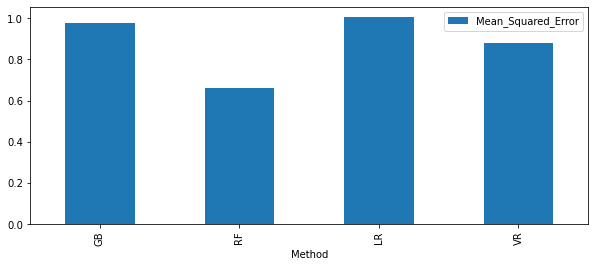

In [23]:
Mean_Squared_Error.plot.bar(x='Method',y='Mean_Squared_Error',figsize=(10,4))


### • We can see that the Random Forest column has the lowest error. 

## We will run all the algorithms and see the evaluation of all of them.

In [24]:
eval_res_1st = metrics.r2_score(y_test,Pred_df['GB'])
eval_res_2st = metrics.r2_score(y_test,Pred_df['RF'])
eval_res_3st = metrics.r2_score(y_test,Pred_df['LR'])
eval_res_4st = metrics.r2_score(y_test,Pred_df['VR'])
print("This is the Gradient Boosting Regressor Evaluation:",eval_res_1st)
print("This is the Random Forest Regressor Evaluation:",eval_res_2st)
print("This is the Linear Regression Evaluation:",eval_res_3st)
print("This is the Voting Regressor Evaluation:",eval_res_4st)

This is the Gradient Boosting Regressor Evaluation: 0.45617963620922797
This is the Random Forest Regressor Evaluation: 0.8875497462107657
This is the Linear Regression Evaluation: 0.3905837099851146
This is the Voting Regressor Evaluation: 0.6438877556614185


### • We can see the Random Forest Regression model has the best evaluation ( 88.75%) as we expected so we decide to choose it as our model.

In [25]:
df_res2

,Actual,Predicted
10809,6.1,5.484286
23069,6.1,5.956000
24092,6.3,6.529000
15491,5.3,5.595000
28828,3.4,3.300310
...,...,...
13217,4.6,4.961000
10961,6.4,6.198000
18499,6.1,6.120000
4610,5.2,5.505500


## We will present the evaluation in the graph with the Least Squares method which shows the distances between the predicted scores and the original scores.

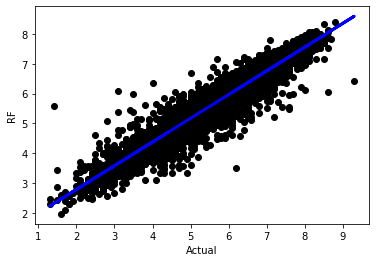

Slope: [[0.7949135]]
Intercept: [1.19748396]
R2: 0.8997709187582658


In [26]:
lr_imdb_grades = linear_model.LinearRegression()

x = df_res2['Actual'].values.reshape(df_res2['Actual'].shape[0],1)
y = Pred_df['RF'].values.reshape(Pred_df['RF'].shape[0],1)

lr_imdb_grades.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_imdb_grades.predict(x), color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('RF')
plt.show()

print("Slope:",lr_imdb_grades.coef_)
print("Intercept:",lr_imdb_grades.intercept_)
print("R2:",lr_imdb_grades.score(x,y))